In [1]:
import pandas
import geopandas 
import matplotlib.pyplot as plt
from   matplotlib.pyplot import imread
import matplotlib.patches as mpatches
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeat
#import cartopy.io.shapereader as shpreader
from   cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import shapely.geometry as sgeom
from   shapely.geometry import LineString
from   shapely.geometry import MultiPoint
from   shapely.geometry import Point

%matplotlib inline

In [2]:
track_line_gdf        = geopandas.read_file('laura_shape_files/al132020_5day_011/al132020-011_5day_lin.shp')
cone_gdf              = geopandas.read_file('laura_shape_files/al132020_5day_011/al132020-011_5day_pgn.shp')
points_gdf            = geopandas.read_file('laura_shape_files/al132020_5day_011/al132020-011_5day_pts.shp')
ww_gdf                = geopandas.read_file('laura_shape_files/al132020_5day_011/al132020-011_ww_wwlin.shp')

init_radii_gdf        = geopandas.read_file('laura_shape_files/al132020_fcst_011/al132020_2020082215_initialradii.shp')
fcst_radii_gdf        = geopandas.read_file('laura_shape_files/al132020_fcst_011/al132020_2020082215_forecastradii.shp')

best_track_points_gdf = geopandas.read_file('laura_shape_files/al132020_best_track/AL132020_pts.shp')
best_track_line_gdf   = geopandas.read_file('laura_shape_files/al132020_best_track/AL132020_lin.shp')
best_track_radii_gdf  = geopandas.read_file('laura_shape_files/al132020_best_track/AL132020_radii.shp')
best_track_swath_gdf  = geopandas.read_file('laura_shape_files/al132020_best_track/AL132020_windswath.shp')

wsp_34_gdf            = geopandas.read_file('laura_shape_files/2020082212_wsp_120hr/2020082212_wsp34knt120hr_5km.shp')
wsp_50_gdf            = geopandas.read_file('laura_shape_files/2020082212_wsp_120hr/2020082212_wsp50knt120hr_5km.shp')
wsp_64_gdf            = geopandas.read_file('laura_shape_files/2020082212_wsp_120hr/2020082212_wsp64knt120hr_5km.shp')

gtwo_areas_gdf        = geopandas.read_file('laura_shape_files/gtwo_shapefiles/gtwo_areas_202108261157.shp')
gtwo_lines_gdf        = geopandas.read_file('laura_shape_files/gtwo_shapefiles/gtwo_lines_202108261157.shp')
gtwo_points_gdf       = geopandas.read_file('laura_shape_files/gtwo_shapefiles/gtwo_points_202108261157.shp')

breakingpoints_2021   = geopandas.read_file('breakpoints_2021/Breakpoints_2021.shp')

In [3]:
hispaniola_gdf                 = geopandas.read_file('../shape_files/rd_shapes/vectores/hispaniola.shp')
división_prov_muni_y_dist_muni = geopandas.read_file('../shape_files/rd_shapes/vectores/División_Prov_Muni_y_Dist_MuniUTM.shp')
limite_gdf                     = geopandas.read_file('../shape_files/rd_shapes/vectores/limite_frontera.shp')
fay_gdf                        = geopandas.read_file('../shape_files/rd_shapes/vectores/FAY.shp')
silueta_haiti_gdf              = geopandas.read_file('../shape_files/rd_shapes/vectores/silueta_haiti.shp')
silueta_rd_gdf                 = geopandas.read_file('../shape_files/rd_shapes/vectores/silueta_rd.shp')
PROVINCIAS_gdf                 = geopandas.read_file('../shape_files/rd_shapes/vectores/PROVINCIAS.shp')
RIOS_gdf                       = geopandas.read_file('../shape_files/rd_shapes/vectores/RIOS.shp')
cuencas_hidro_gdf              = geopandas.read_file('../shape_files/rd_shapes/cuencas_hidrograficas_rd/Cuencas_Hidrograficas_RD.shp')
cuencas_presas_gdf             = geopandas.read_file('../shape_files/rd_shapes/cuencas_presas/Presas-CuencasAporte.shp')


hispaniola_gdf                 = hispaniola_gdf.to_crs("EPSG:4326")
división_prov_muni_y_dist_muni = división_prov_muni_y_dist_muni.to_crs("EPSG:4326")
limite_gdf                     = limite_gdf.to_crs("EPSG:4326") 
fay_gdf                        = fay_gdf.to_crs("EPSG:4326") 
silueta_haiti_gdf              = silueta_haiti_gdf.to_crs("EPSG:4326") 
silueta_rd_gdf                 = silueta_rd_gdf.to_crs("EPSG:4326") 
PROVINCIAS_gdf                 = PROVINCIAS_gdf.to_crs("EPSG:4326")
RIOS_gdf                       = RIOS_gdf.to_crs("EPSG:4326")
cuencas_hidro_gdf              = cuencas_hidro_gdf.to_crs("EPSG:4326")
cuencas_presas_gdf             = cuencas_presas_gdf.to_crs("EPSG:4326")

In [4]:
map_crs = ccrs.PlateCarree()
data_crs= ccrs.PlateCarree()

In [5]:
breakingpoints_rd_2021 = breakingpoints_2021.loc[(17  < breakingpoints_2021['Latitude'])  & 
                                                 (20  > breakingpoints_2021['Latitude'])  &
                                                 (-67 > breakingpoints_2021['Longitude']) &
                                                 (-72 < breakingpoints_2021['Longitude'])
                                                 ]
breakingpoints_rd_2021_reordered = breakingpoints_rd_2021.reindex([299, 298, 297, 522, 296, 528, 
                                                                   295, 294, 307, 306, 305, 304])

In [6]:
DIR      =  '../shape_files'
Features = ['ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp',
            'ne_10m_land/ne_10m_land.shp', 
            'ne_10m_ocean/ne_10m_ocean.shp',
            'ne_10m_coastline/ne_10m_coastline.shp',
            'ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp']

states_provinces_gdf = geopandas.read_file(f'{DIR}/{Features[0]}')
land_gdf             = geopandas.read_file(f'{DIR}/{Features[1]}')
ocean_gdf            = geopandas.read_file(f'{DIR}/{Features[2]}')
coastline_gdf        = geopandas.read_file(f'{DIR}/{Features[3]}')
countries_gdf        = geopandas.read_file(f'{DIR}/{Features[4]}')

In [7]:
# breaking_point_names_ = []
# for i in range(12):
#     breaking_point_names_.append(breakingpoints_rd_2021_reordered['Name'].iloc[i])
# breaking_point_names_
breaking_point_lat_lon = MultiPoint([(-71.758940, 18.031639),
                                     (-71.422536, 17.604198),
                                     (-71.099600, 18.207900),
                                     (-70.143719, 18.245448),
                                     (-69.893333, 18.476389),
                                     (-69.629739, 18.402116),
                                     (-68.699444, 18.155556),
                                     (-68.326406, 18.605578),
                                     (-69.336389, 19.205278),
                                     (-69.216253, 19.359804),
                                     (-69.936389, 19.665544),
                                     (-70.694444, 19.795833), 
                                     (-71.758479, 19.702891)])
breaking_point_names   = ['Southern Border Dom Rep/Haiti',
                          'Cabo Beata',
                          'Barahona',
                          'Punta Palenque',
                          'Santo Domingo',
                          'Cabo Caucedo',
                          'Isla Saona',
                          'Cabo Engano',
                          'Samana',
                          'Cabo Cabron',
                          'Cabo Frances Viejo',
                          'Puerto Plata',
                          'Northern Border Dom Rep/Haiti']

/home/jmedinah/miniconda3/envs/unidata/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


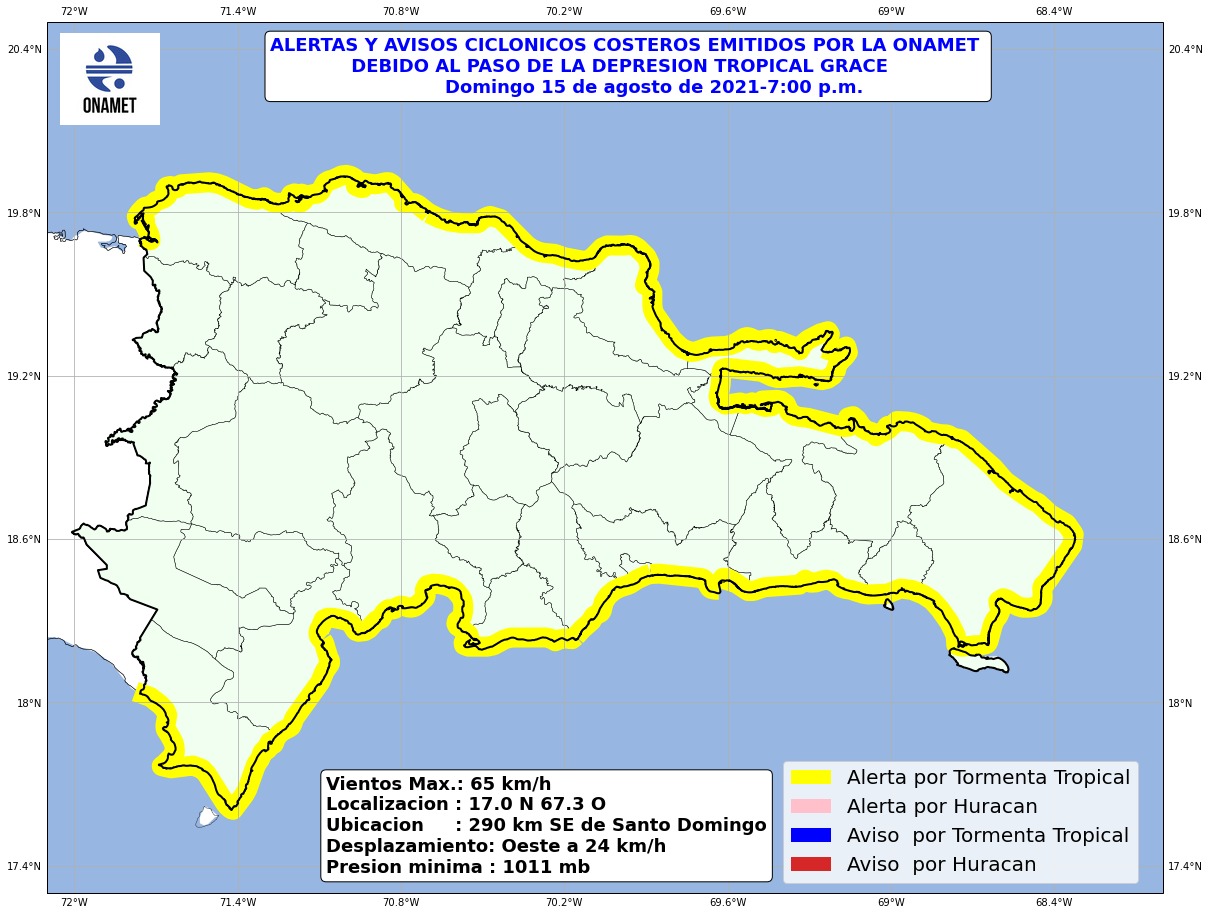

In [8]:
p_ext = np.array(np.array(countries_gdf.loc[countries_gdf['ADMIN'] == 
        'Dominican Republic']['geometry'])[0][0].exterior.coords[:])
multi_points = MultiPoint(p_ext)

#p_bkp = np.array(list(breakingpoints_rd_2021_reordered['geometry'])[0].coords[0])
bkps = list(breakingpoints_rd_2021_reordered['geometry'])

idxs      = [458, 435, 403, 325, 309, 300, 268, 244, 165, 150, 110, 83, 0]
nb_pp     = LineString(multi_points[0:84])
pp_cfv    = LineString(multi_points[83:112])
cfv_cc    = LineString(multi_points[110:152])
cc_smn    = LineString(multi_points[152:167])
smn_ce    = LineString(multi_points[165:245])
ce_is     = LineString(multi_points[243:269])
is_ccd    = LineString(multi_points[267:300])
ccd_sd    = LineString(multi_points[300:310])
sd_pplq   = LineString(multi_points[309:326])
pplq_brhn = LineString(multi_points[325:403])
brhn_cbt  = LineString(multi_points[402:437])
cbt_sb    = LineString(multi_points[435:459])

d = {'coast_segment': ['nb_pp', 'pp_cfv', 'cfv_cc', 'cc_smn', 'smn_ce', 'ce_is', 'is_ccd', 'ccd_sd',
                       'sd_pplq', 'pplq_brhn', 'brhn_cbt', 'cbt_sb'],  
     'geometry'     : [nb_pp, pp_cfv, cfv_cc, cc_smn, smn_ce, ce_is, is_ccd, ccd_sd,
                       sd_pplq, pplq_brhn, brhn_cbt, cbt_sb]}
coast_segment_gdf = geopandas.GeoDataFrame(d, crs="EPSG:4326")



fig = plt.figure(figsize=(20, 20))
ax  = plt.subplot(1, 1, 1, projection = map_crs)


ax.set_extent([-72.1, -68, 17.3, 20.5])
ax.add_feature(cfeat.OCEAN.with_scale('10m'))

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER



ww_colors = {'nb_pp'    : 'yellow',
             'pp_cfv'   : 'yellow',
             'cfv_cc'   : 'yellow',
             'cc_smn'   : 'yellow',
             'smn_ce'   : 'yellow',
             'smn_ce'   : 'yellow',
             'ce_is'    : 'yellow',
             'is_ccd'   : 'yellow',
             'ccd_sd'   : 'yellow',
             'sd_pplq'  : 'yellow',
             'pplq_brhn': 'yellow',
             'brhn_cbt' : 'yellow',
             'cbt_sb'   : 'yellow',
            }
ax.add_geometries(hispaniola_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=0.5, alpha=0.7)
ax.add_geometries(limite_gdf['geometry'], crs=data_crs, facecolor='none',
                  edgecolor='black', linewidth=1, alpha=0.7)
ax.add_geometries(silueta_haiti_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=0.5)
ax.add_geometries(silueta_rd_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=2, zorder = 10)
ax.add_geometries(PROVINCIAS_gdf['geometry'], crs=data_crs, facecolor='honeydew',
                 edgecolor='black', linewidth=0.5)
# ax.scatter(breakingpoints_rd_2021['Longitude'], breakingpoints_rd_2021['Latitude'],transform=data_crs,
#                 zorder=10, color = 'black', s=50)


for ww_type in ww_colors.keys():
    ww_subset = coast_segment_gdf[coast_segment_gdf['coast_segment']==ww_type]
    ax.add_geometries(ww_subset['geometry'], facecolor='none',
                     edgecolor=ww_colors[ww_type], crs=data_crs,
                     linewidth=20, alpha = 1)
    
logo = imread('../onamet-logo.jpg')
fig.figimage(logo, 60, 790, zorder=100)

props = dict(boxstyle='round', facecolor='white', alpha=1)

xtxt = 0.2
ytxt = 0.983
text = 'ALERTAS Y AVISOS CICLONICOS COSTEROS EMITIDOS POR LA ONAMET \n             DEBIDO AL PASO DE LA DEPRESION TROPICAL GRACE\n                            Domingo 15 de agosto de 2021-7:00 p.m.'
ax.text(xtxt, ytxt, text, transform=ax.transAxes, fontsize=18, verticalalignment='top', bbox=props, 
        weight = 'bold', color = 'blue')



xtxt = 0.25
ytxt = 0.135
text = 'Vientos Max.: 65 km/h\nLocalizacion : 17.0 N 67.3 O\nUbicacion     : 290 km SE de Santo Domingo\nDesplazamiento: Oeste a 24 km/h\nPresion minima : 1011 mb'
        
ax.text(xtxt, ytxt, text, transform=ax.transAxes, fontsize=18, verticalalignment='top', bbox=props, 
        weight = 'bold')


TWA = mpatches.Rectangle((0, 0), 1, 1, facecolor="yellow")
HWA = mpatches.Rectangle((0, 0), 1, 1, facecolor="pink")
TWR = mpatches.Rectangle((0, 0), 1, 1, facecolor="blue")
HWR = mpatches.Rectangle((0, 0), 1, 1, facecolor="tab:red")
labels = ['Alerta por Tormenta Tropical',
          'Alerta por Huracan', 
          'Aviso  por Tormenta Tropical',
          'Aviso  por Huracan']
ax.legend([TWA, HWA, TWR, HWR], labels, loc='lower left', bbox_to_anchor=(0.65, 0), fancybox=True, fontsize = 20)

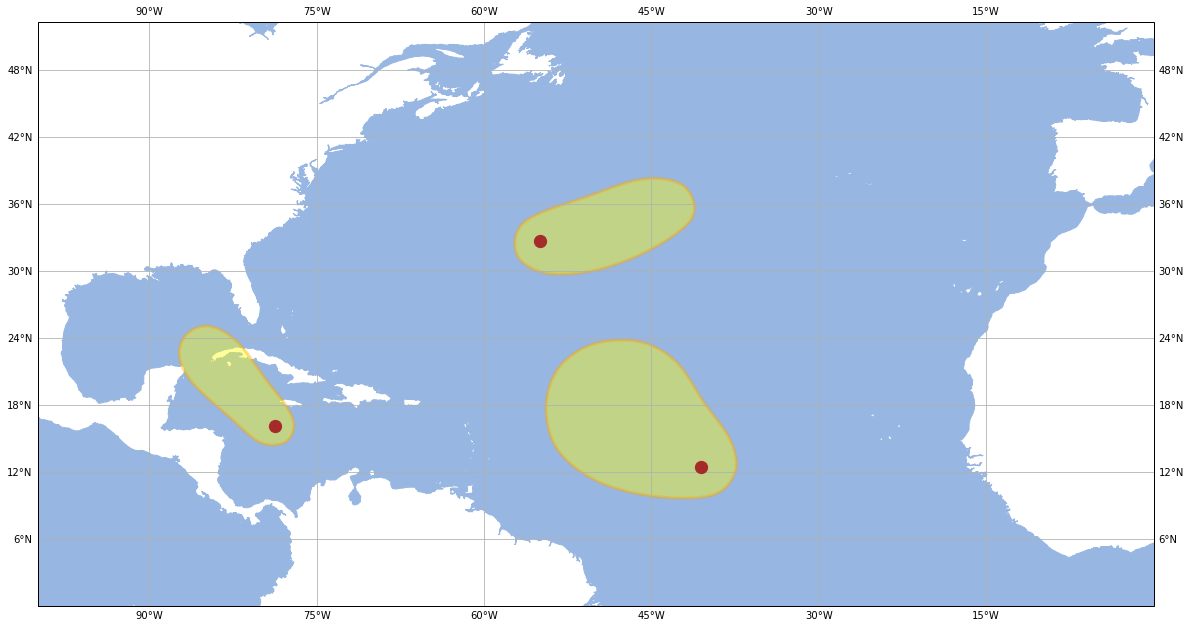

In [9]:

fig = plt.figure(figsize=(20, 20))
ax  = plt.subplot(1, 1, 1, projection = map_crs)

ax.set_extent([-100, 0, 0, 40])

ax.add_feature(cfeat.OCEAN.with_scale('10m'))

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER


ax.add_geometries(gtwo_areas_gdf['geometry'], crs=data_crs, facecolor='yellow',
                   edgecolor='orange', linewidth=3, alpha = 0.4)
# ax.add_geometries(gtwo_lines_gdf['geometry'], crs=data_crs, facecolor='none',
#                    edgecolor='black', linewidth=2)
ax.scatter(gtwo_points_gdf['geometry'].x, gtwo_points_gdf['geometry'].y,transform=data_crs,
                zorder=10, color = 'brown', s=150)



In [10]:
gtwo_points_gdf

,BASIN,AREA,PROB2DAY,RISK2DAY,PROB5DAY,RISK5DAY,geometry
0,Atlantic,1,90%,High,90%,High,POINT (-78.75000 16.07000)
1,Atlantic,2,40%,Medium,70%,High,POINT (-54.98000 32.72000)
2,Atlantic,3,40%,Medium,50%,Medium,POINT (-40.51000 12.42000)


In [11]:
#### very useful for loop
# a = np.array([])
# for pnt in multi_points:
#         min_distance = pnt.distance(breaking_point_lat_lon[9])
#         a = np.append(a, min_distance)

# print(multi_points[a.argmin()])
# print(a.argmin())


# b = np.array([])
# for pnt in multi_points:
#     a = np.array([])
#     for bkp in bkps:
#         min_distance = pnt.distance(breaking_point_lat_lon)
#         a = np.append(a, min_distance)
#     b = np.append(b, a.argmin())
        

# #     b = np.append(b, a.argmin())
# b[0] 
 
        
# #[list(multi_points)[a.argmin()].xy]    
       



/home/jmedinah/miniconda3/envs/unidata/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


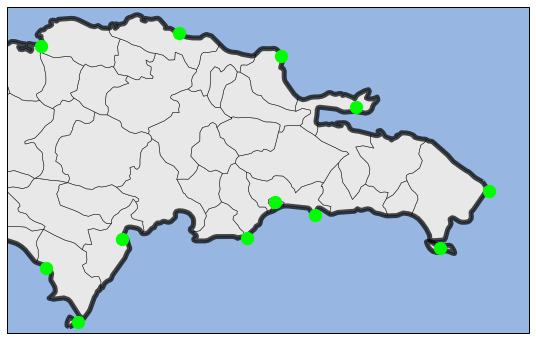

In [12]:
fig = plt.figure(figsize=(10, 6))
ax  = plt.subplot(1, 1, 1, projection = map_crs)

ax.set_extent([-72, -68, 17.5, 20])
ax.add_feature(cfeat.OCEAN.with_scale('10m'))

# ax.add_geometries(ocean_gdf['geometry'], crs=data_crs, facecolor='lightblue',
#                  edgecolor='none')
ax.add_geometries(land_gdf['geometry'], crs=data_crs, facecolor='lightgray',
                 edgecolor='none', alpha = 0.5)
ax.add_geometries(states_provinces_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=0.5, alpha=0.7)
ax.add_geometries(coastline_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=5, alpha=0.7)


sc = ax.scatter(breakingpoints_rd_2021['Longitude'], breakingpoints_rd_2021['Latitude'],transform=data_crs,
                zorder=10, color = 'lime', s=150)

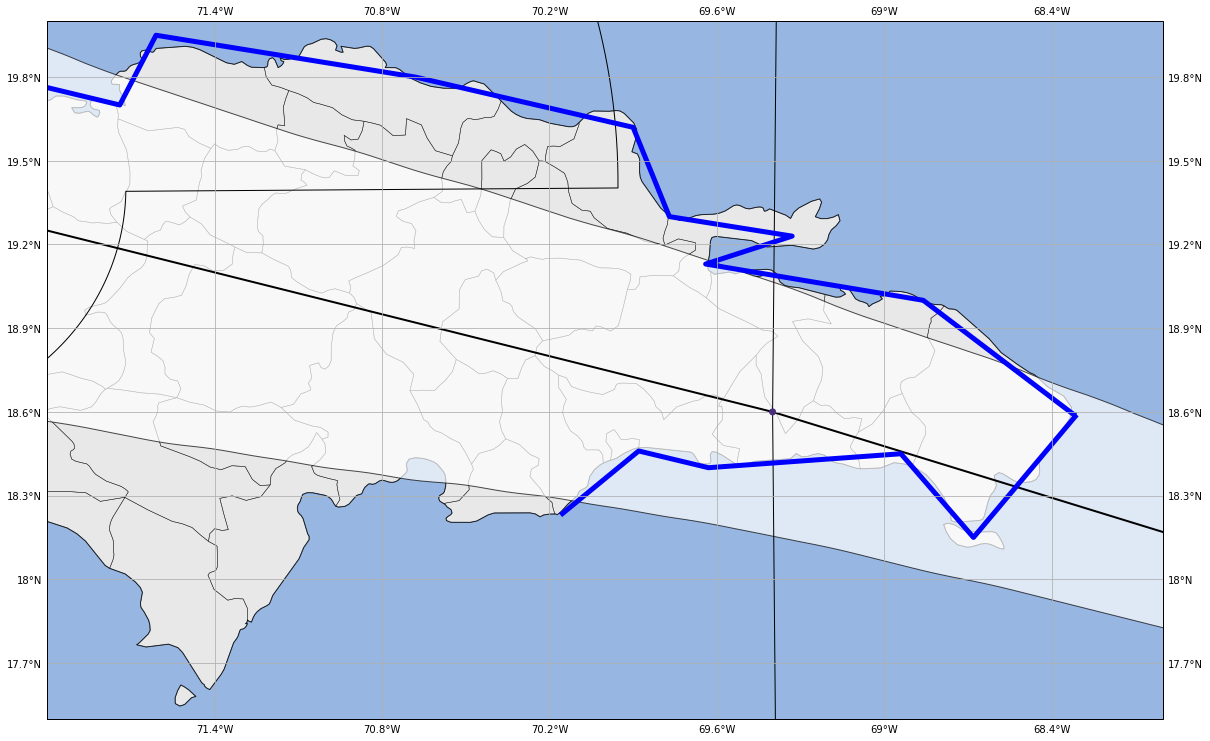

In [13]:
fig = plt.figure(figsize=(20, 20))
ax  = plt.subplot(1, 1, 1, projection = map_crs)

ax.set_extent([-100, -50, 10, 40])
ax.set_extent([-72, -68, 17.5, 20])
ax.add_feature(cfeat.OCEAN.with_scale('10m'))

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER

# ax.add_geometries(ocean_gdf['geometry'], crs=data_crs, facecolor='lightblue',
#                  edgecolor='none')
ax.add_geometries(land_gdf['geometry'], crs=data_crs, facecolor='lightgray',
                 edgecolor='none', alpha = 0.5)
ax.add_geometries(states_provinces_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=0.5, alpha=0.7)
ax.add_geometries(coastline_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=1, alpha=0.7)

ax.add_geometries(cone_gdf['geometry'], crs=data_crs, facecolor='white',
                 edgecolor='black', linewidth=1, alpha=0.7)
ax.add_geometries(track_line_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=2)
sc = ax.scatter(points_gdf['LON'], points_gdf['LAT'],transform=data_crs,
                zorder=10, c=points_gdf['MAXWIND'])
ax.add_geometries(init_radii_gdf['geometry'], crs=data_crs, facecolor='brown',
                 edgecolor='none', linewidth=0.1, alpha=0.5)
ax.add_geometries(fcst_radii_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=1)

ww_colors = {'TWA': 'yellow',
             'HWA': 'pink',
             'TWR': 'blue',
             'HWR': 'tab:red'}

for ww_type in ww_colors.keys():
    ww_subset = ww_gdf[ww_gdf['TCWW']==ww_type]
    ax.add_geometries(ww_subset['geometry'], facecolor='none',
                     edgecolor=ww_colors[ww_type], crs=data_crs,
                     linewidth=5)
#plt.colorbar(sc)

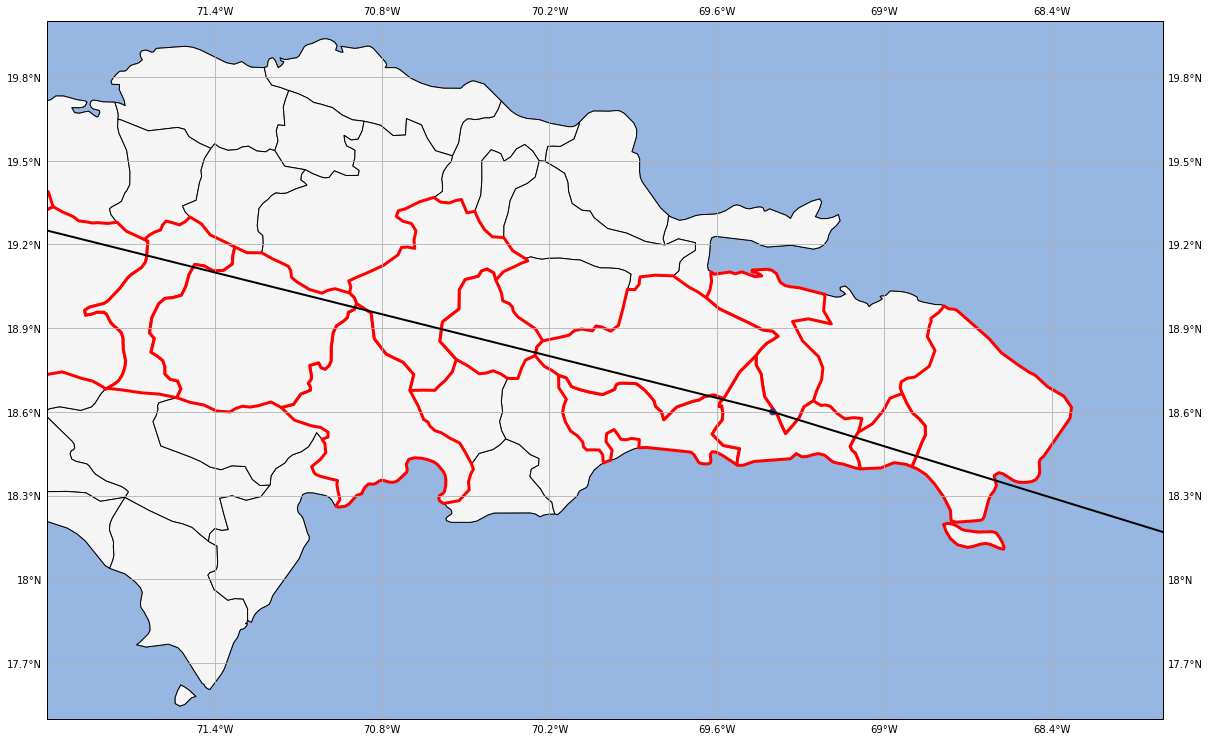

In [14]:
fig = plt.figure(figsize=(20, 20))
ax  = plt.subplot(1, 1, 1, projection = map_crs)

ax.set_extent([-100, -50, 10, 40])
ax.set_extent([-72, -68, 17.5, 20])
ax.add_feature(cfeat.OCEAN.with_scale('10m'))

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER


ax.add_geometries(land_gdf['geometry'], crs=data_crs, facecolor='lightgray',
                 edgecolor='none', alpha = 0.5)

ax.add_geometries(coastline_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=1, alpha=0.7)


ax.add_geometries(track_line_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=2, zorder = 100)
sc = ax.scatter(points_gdf['LON'], points_gdf['LAT'],transform=data_crs,
                zorder=100, c=points_gdf['MAXWIND'])
track = sgeom.LineString(zip(points_gdf['LON'], points_gdf['LAT']))

def colorize_state(geometry):
        #facecolor = (0.9375, 0.9375, 0.859375)
        edgecolor  =  'black'
        linewidth  =     1
        if geometry.intersects(track):
            #facecolor = 'red'
            edgecolor = 'red'
            linewidth =   3
        return {'facecolor': 'whitesmoke', 'edgecolor': edgecolor, 'linewidth': linewidth}
ax.add_geometries(states_provinces_gdf['geometry'], crs=data_crs, styler=colorize_state)
# ax.add_geometries(
#         shpreader.Reader(states_shp).geometries(),
#         ccrs.PlateCarree(),
#         styler=colorize_state)

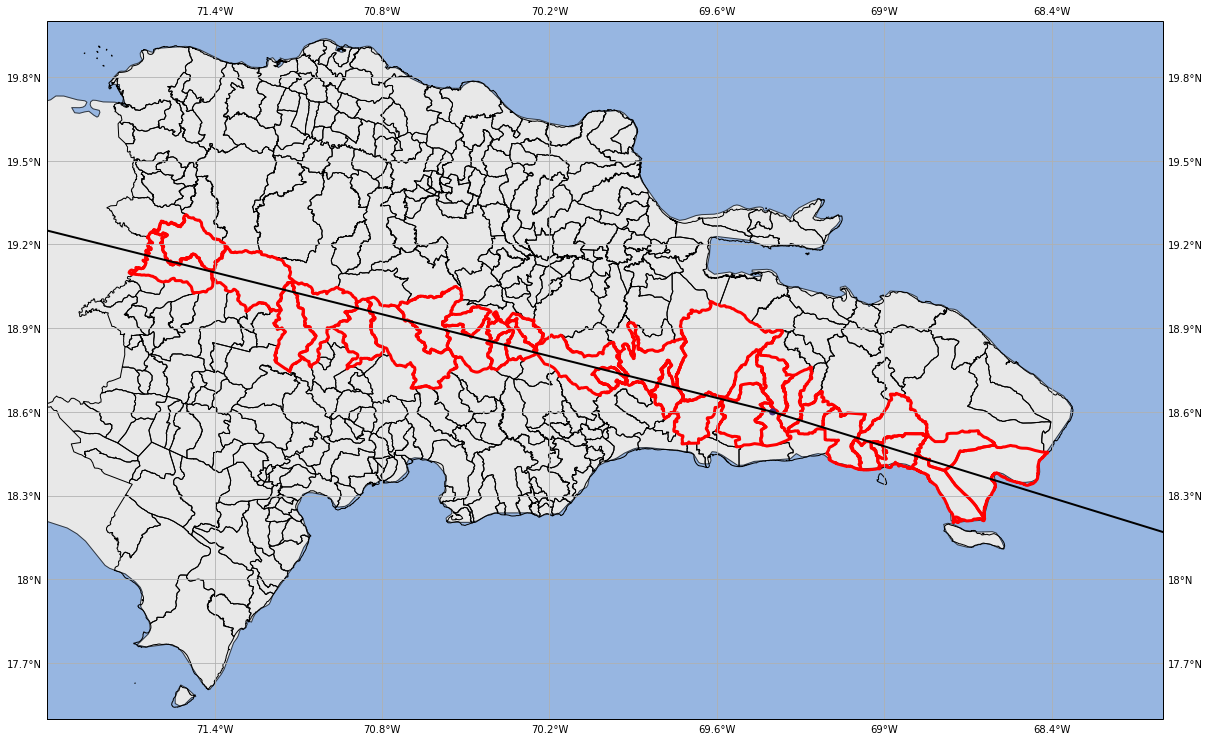

In [15]:
fig = plt.figure(figsize=(20, 20))
ax  = plt.subplot(1, 1, 1, projection = map_crs)

ax.set_extent([-100, -50, 10, 40])
ax.set_extent([-72, -68, 17.5, 20])
ax.add_feature(cfeat.OCEAN.with_scale('10m'))

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER


ax.add_geometries(land_gdf['geometry'], crs=data_crs, facecolor='lightgray',
                 edgecolor='none', alpha = 0.5)

ax.add_geometries(coastline_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=1, alpha=0.7)


ax.add_geometries(track_line_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=2, zorder = 100)
sc = ax.scatter(points_gdf['LON'], points_gdf['LAT'],transform=data_crs,
                zorder=100, c=points_gdf['MAXWIND'])
track = sgeom.LineString(zip(points_gdf['LON'], points_gdf['LAT']))

def colorize_state(geometry):
        #facecolor = (0.9375, 0.9375, 0.859375)
        edgecolor  =  'black'
        linewidth  =     1
        if geometry.intersects(track):
            #facecolor = 'red'
            edgecolor = 'red'
            linewidth =   3
        return {'edgecolor': edgecolor, 'linewidth': linewidth}

ax.add_geometries(división_prov_muni_y_dist_muni['geometry'], crs=data_crs, styler=colorize_state, facecolor='none')

# ax.add_geometries(
#         shpreader.Reader(states_shp).geometries(),
#         ccrs.PlateCarree(),
#         styler=colorize_state)

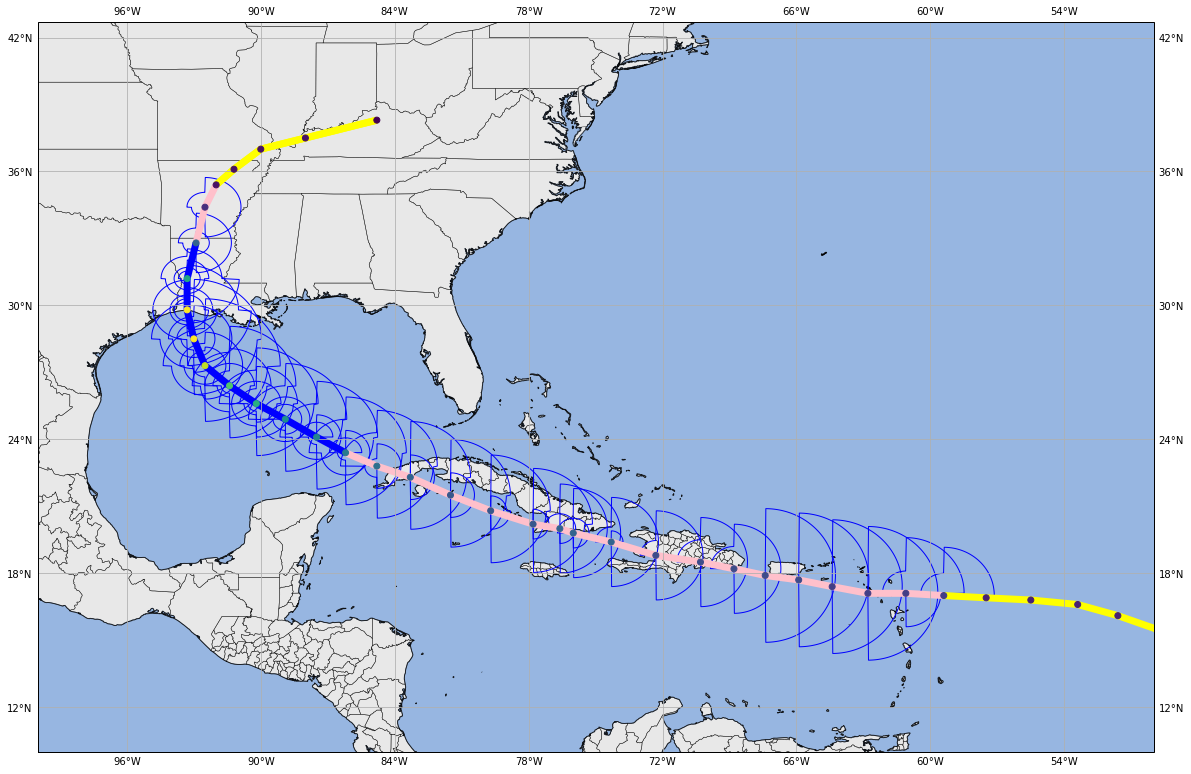

In [16]:
fig = plt.figure(figsize=(20, 20))
ax  = plt.subplot(1, 1, 1, projection = map_crs)

ax.set_extent([-100, -50, 10, 40])
ax.add_feature(cfeat.OCEAN.with_scale('10m'))

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER

# ax.add_geometries(ocean_gdf['geometry'], crs=data_crs, facecolor='lightblue',
#                  edgecolor='none')
ax.add_geometries(land_gdf['geometry'], crs=data_crs, facecolor='lightgray',
                 edgecolor='none', alpha = 0.5)
ax.add_geometries(states_provinces_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=0.5, alpha=0.7)
ax.add_geometries(coastline_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=1, alpha=0.7)


sc_2 = ax.scatter(best_track_points_gdf['LON'], best_track_points_gdf['LAT'],
                  transform=data_crs, zorder=10, c=best_track_points_gdf['INTENSITY'])
# ax.add_geometries(best_track_line_gdf['geometry'], crs=data_crs, facecolor='none',
#                   edgecolor='black', linewidth=2)
ax.add_geometries(best_track_radii_gdf['geometry'], crs=data_crs, facecolor='none',
                  edgecolor='blue')
# ax.add_geometries(best_track_swath_gdf['geometry'], crs=data_crs, facecolor='none',
#                   edgecolor='white')

btl_colors ={'TD': 'yellow',
             'TS': 'pink',
             'HU': 'blue',
             'MH': 'tab:red'}

for btl_type in btl_colors.keys():
    btl_subset = best_track_line_gdf[best_track_line_gdf['STORMTYPE']== btl_type]
    ax.add_geometries(btl_subset['geometry'], facecolor='none',
                     edgecolor=btl_colors[btl_type], crs=data_crs,
                     linewidth=7, alpha = 1)

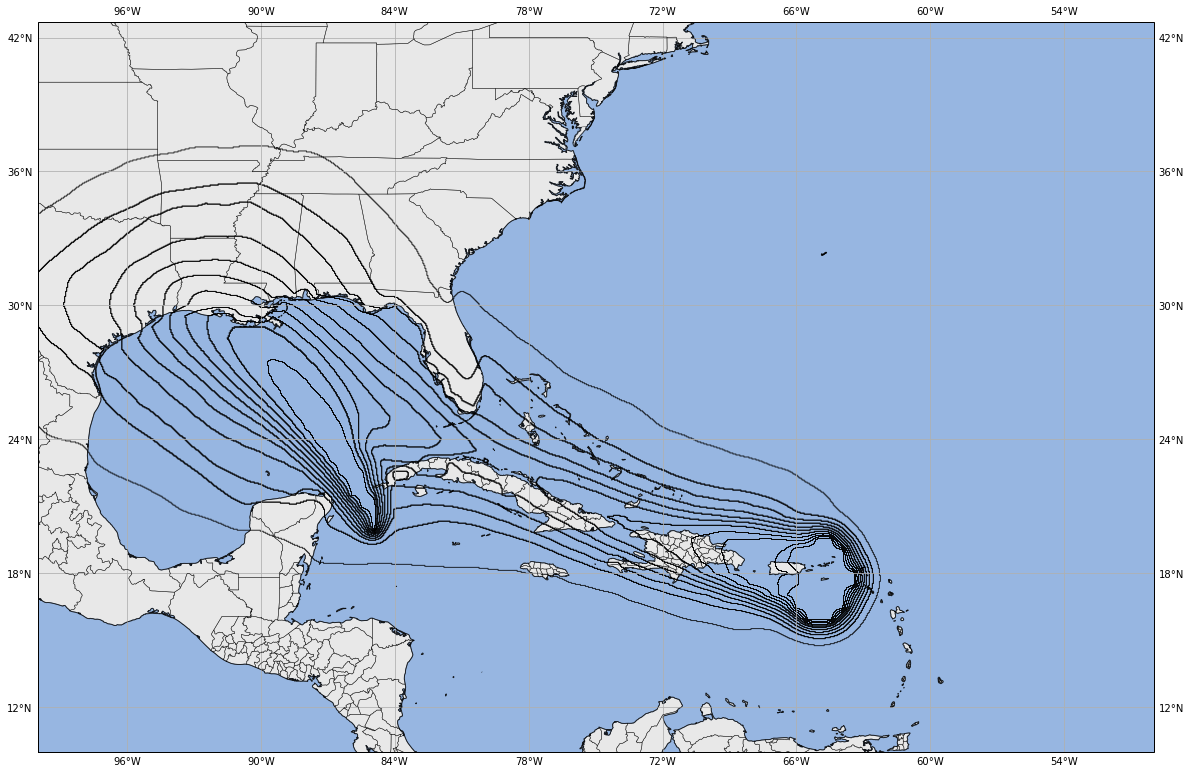

In [18]:
fig = plt.figure(figsize=(20, 20))
ax  = plt.subplot(1, 1, 1, projection = map_crs)

ax.set_extent([-100, -50, 10, 40])
ax.add_feature(cfeat.OCEAN.with_scale('10m'))

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER

# ax.add_geometries(ocean_gdf['geometry'], crs=data_crs, facecolor='lightblue',
#                  edgecolor='none')
ax.add_geometries(land_gdf['geometry'], crs=data_crs, facecolor='lightgray',
                 edgecolor='none', alpha = 0.5, zorder = -1)
ax.add_geometries(states_provinces_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=0.5, alpha=0.7, zorder = 10)
ax.add_geometries(coastline_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=1, alpha=0.7)


ax.add_geometries(wsp_34_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', alpha=0.8)
    

# wsp_colors = {'<5%'   : 'none',   '5-10%' : 'darkgreen','10-20%': 'green', '20-30%' : 'lime',
#               '30-40%': 'yellow', '40-50%': 'gold',     '50-60%': 'orange','60-70%' : 'darkgoldenrod',
#               '70-80%': 'tab:red','80-90%': 'brown',    '>90%'  : 'purple'}

# for wsp_type in wsp_colors.keys():
#     wsp_subset = wsp_34_gdf[wsp_34_gdf['PERCENTAGE']== wsp_type]
#     ax.add_geometries(wsp_subset['geometry'], facecolor=wsp_colors[wsp_type],
#                      edgecolor=wsp_colors[wsp_type], crs=data_crs,
#                      linewidth=1, alpha = 1)



/home/jmedinah/miniconda3/envs/unidata/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


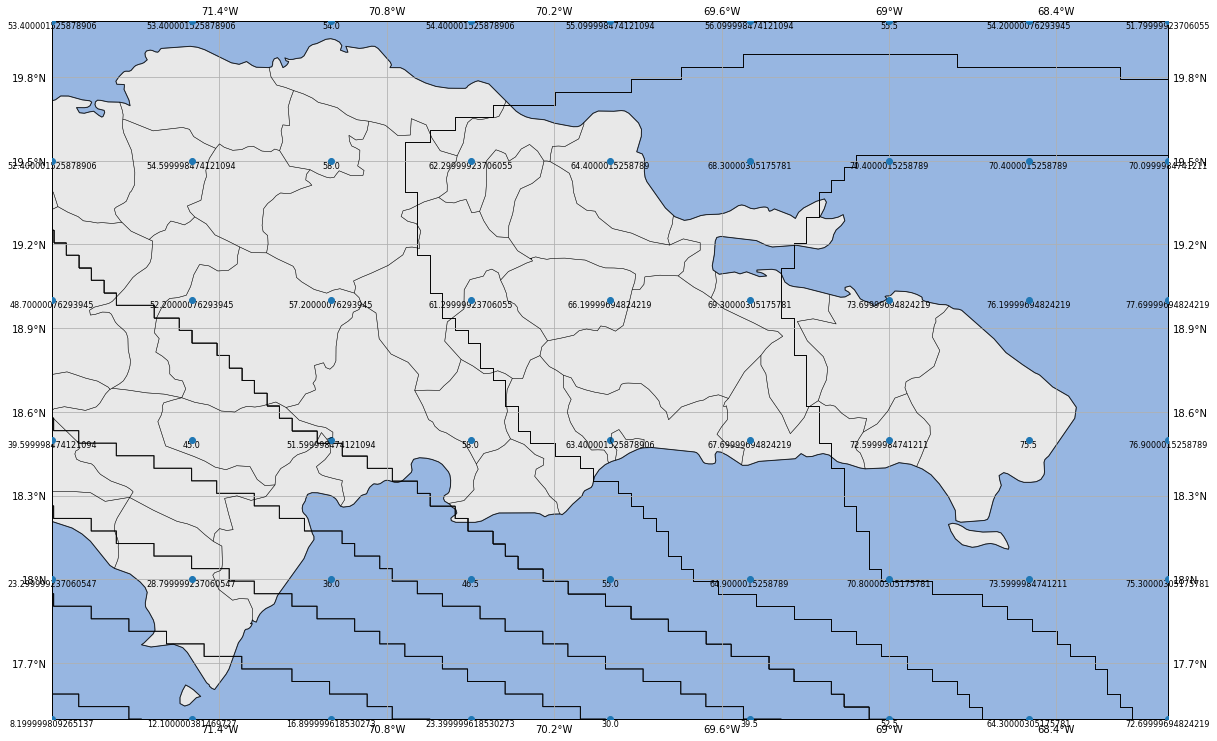

In [25]:
fig = plt.figure(figsize=(20, 20))
ax  = plt.subplot(1, 1, 1, projection = map_crs)

ax.set_extent([-100, -50, 10, 40])
ax.set_extent([-72, -68, 17.5, 20])
ax.add_feature(cfeat.OCEAN.with_scale('10m'))

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER

# ax.add_geometries(ocean_gdf['geometry'], crs=data_crs, facecolor='lightblue',
#                  edgecolor='none')
ax.add_geometries(land_gdf['geometry'], crs=data_crs, facecolor='lightgray',
                 edgecolor='none', alpha = 0.5, zorder = -1)
ax.add_geometries(states_provinces_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=0.5, alpha=0.7, zorder = 10)
ax.add_geometries(coastline_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=1, alpha=0.7)

wsp_34_points_gdf = geopandas.read_file('laura_shape_files/2020082212_wsp_120hr/2020082212_wsp34knt120hr_halfDeg.shp')
wsp_34_points_gdf["PWIND120"] = pandas.to_numeric(wsp_34_points_gdf["PWIND120"], downcast="float")
wsp_34_points_gdf = wsp_34_points_gdf[wsp_34_points_gdf['PWIND120'] > 0]

ax.scatter(wsp_34_points_gdf['geometry'].x, wsp_34_points_gdf['geometry'].y,
                  transform=data_crs,  zorder=10)

wsp_34_points_gdf.apply(lambda x: ax.annotate(text=x.PWIND120, xy=(x.geometry.x, x.geometry.y), 
                                                fontsize = 8, ha='center', weight = 'normal', 
                                                va = 'top'), axis=1)
ax.add_geometries(wsp_34_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', alpha=0.8)

In [ ]:
type(wsp_34_points_gdf['PWIND120'])

In [22]:
 
wsp_34_points_gdf["PWIND120"] = pandas.to_numeric(wsp_34_points_gdf["PWIND120"], downcast="float")
wsp_34_points_gdf

,PWIND120,geometry
0,0.1,POINT (115.00000 37.00000)
1,0.1,POINT (115.00000 37.50000)
2,0.1,POINT (115.00000 38.00000)
3,0.1,POINT (115.00000 38.50000)
4,0.1,POINT (115.00000 39.00000)
...,...,...
5008,1.8,POINT (-63.50000 18.50000)
5009,0.6,POINT (-63.50000 19.00000)
5010,0.4,POINT (-63.50000 19.50000)
5011,0.2,POINT (-63.50000 20.00000)
